# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from scipy import stats
import os
import csv
from pprint import pprint
import datetime

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

579

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

query_url = f"{url}appid={weather_api_key}&units={units}&q="

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
city_name = []
cloudiness = []
country = []
date = []
humidity = []
lat = []
lng = []
max_temp = []
wind_speed = []

record =1

print(f"-------------------------------")
print(f"Beginning Data Retrieval")
print(f"-------------------------------")

-------------------------------
Beginning Data Retrieval
-------------------------------


In [5]:
for city in cities:
    try:
        response = requests.get(query_url + city).json() 
        city_name.append(response["name"])
        cloudiness.append(response["clouds"]["all"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        humidity.append(response["main"]["humidity"])
        max_temp.append(response["main"]["temp_max"])
        lat.append(response["coord"]["lat"])
        lng.append(response["coord"]["lon"])
        wind_speed.append(response["wind"]["speed"])
        city_record = response["name"]
        print(f"Processing Record {record} | {city_record}")
        print(f"{url}&q={city}")
        record= record + 1
        time.sleep(1.01)
    except:
        print("City not found. Skipping...")
    continue

City not found. Skipping...
Processing Record 1 | Butaritari
http://api.openweathermap.org/data/2.5/weather?&q=butaritari
Processing Record 2 | Khao Yoi
http://api.openweathermap.org/data/2.5/weather?&q=khao yoi
Processing Record 3 | Tiksi
http://api.openweathermap.org/data/2.5/weather?&q=tiksi
Processing Record 4 | Avarua
http://api.openweathermap.org/data/2.5/weather?&q=avarua
Processing Record 5 | Rikitea
http://api.openweathermap.org/data/2.5/weather?&q=rikitea
Processing Record 6 | Jamestown
http://api.openweathermap.org/data/2.5/weather?&q=jamestown
Processing Record 7 | Punta Arenas
http://api.openweathermap.org/data/2.5/weather?&q=punta arenas
Processing Record 8 | New Norfolk
http://api.openweathermap.org/data/2.5/weather?&q=new norfolk
Processing Record 9 | Nouadhibou
http://api.openweathermap.org/data/2.5/weather?&q=nouadhibou
Processing Record 10 | Fichē
http://api.openweathermap.org/data/2.5/weather?&q=fiche
Processing Record 11 | Busselton
http://api.openweathermap.org/da

Processing Record 87 | Bandiagara
http://api.openweathermap.org/data/2.5/weather?&q=bandiagara
Processing Record 88 | Cumberland
http://api.openweathermap.org/data/2.5/weather?&q=cumberland
Processing Record 89 | Bethel
http://api.openweathermap.org/data/2.5/weather?&q=bethel
City not found. Skipping...
Processing Record 90 | Polunochnoye
http://api.openweathermap.org/data/2.5/weather?&q=polunochnoye
Processing Record 91 | Bonthe
http://api.openweathermap.org/data/2.5/weather?&q=bonthe
Processing Record 92 | Upernavik
http://api.openweathermap.org/data/2.5/weather?&q=upernavik
City not found. Skipping...
Processing Record 93 | Kavaratti
http://api.openweathermap.org/data/2.5/weather?&q=kavaratti
Processing Record 94 | Ternate
http://api.openweathermap.org/data/2.5/weather?&q=ternate
Processing Record 95 | Zabul Province
http://api.openweathermap.org/data/2.5/weather?&q=zabol
Processing Record 96 | Vestmannaeyjar
http://api.openweathermap.org/data/2.5/weather?&q=vestmannaeyjar
Processin

Processing Record 173 | Namatanai
http://api.openweathermap.org/data/2.5/weather?&q=namatanai
Processing Record 174 | Olafsvik
http://api.openweathermap.org/data/2.5/weather?&q=olafsvik
Processing Record 175 | Bengkulu
http://api.openweathermap.org/data/2.5/weather?&q=bengkulu
Processing Record 176 | Belmonte
http://api.openweathermap.org/data/2.5/weather?&q=belmonte
Processing Record 177 | Ahipara
http://api.openweathermap.org/data/2.5/weather?&q=ahipara
Processing Record 178 | San Jose
http://api.openweathermap.org/data/2.5/weather?&q=san jose
Processing Record 179 | Mildura
http://api.openweathermap.org/data/2.5/weather?&q=mildura
Processing Record 180 | Melbourne
http://api.openweathermap.org/data/2.5/weather?&q=melbourne
Processing Record 181 | Bílina
http://api.openweathermap.org/data/2.5/weather?&q=bilina
Processing Record 182 | Carutapera
http://api.openweathermap.org/data/2.5/weather?&q=carutapera
Processing Record 183 | Puerto Madryn
http://api.openweathermap.org/data/2.5/wea

Processing Record 259 | Clyde River
http://api.openweathermap.org/data/2.5/weather?&q=clyde river
Processing Record 260 | Yerbogachën
http://api.openweathermap.org/data/2.5/weather?&q=yerbogachen
Processing Record 261 | Tomohon
http://api.openweathermap.org/data/2.5/weather?&q=tomohon
City not found. Skipping...
Processing Record 262 | Scottsbluff
http://api.openweathermap.org/data/2.5/weather?&q=scottsbluff
Processing Record 263 | Barrie
http://api.openweathermap.org/data/2.5/weather?&q=barrie
Processing Record 264 | Kieta
http://api.openweathermap.org/data/2.5/weather?&q=kieta
Processing Record 265 | Tripoli
http://api.openweathermap.org/data/2.5/weather?&q=tripoli
Processing Record 266 | Örnsköldsvik
http://api.openweathermap.org/data/2.5/weather?&q=ornskoldsvik
Processing Record 267 | La Romana
http://api.openweathermap.org/data/2.5/weather?&q=la romana
Processing Record 268 | Comodoro Rivadavia
http://api.openweathermap.org/data/2.5/weather?&q=comodoro rivadavia
Processing Record 

Processing Record 344 | Marrakesh
http://api.openweathermap.org/data/2.5/weather?&q=marrakesh
Processing Record 345 | Zhangjiakou
http://api.openweathermap.org/data/2.5/weather?&q=zhangjiakou
Processing Record 346 | Sola
http://api.openweathermap.org/data/2.5/weather?&q=sola
Processing Record 347 | Necochea
http://api.openweathermap.org/data/2.5/weather?&q=necochea
Processing Record 348 | Verkhnetulomskiy
http://api.openweathermap.org/data/2.5/weather?&q=verkhnetulomskiy
City not found. Skipping...
Processing Record 349 | Songyuan
http://api.openweathermap.org/data/2.5/weather?&q=qianguo
Processing Record 350 | Sioux Lookout
http://api.openweathermap.org/data/2.5/weather?&q=sioux lookout
Processing Record 351 | Saint-Leu
http://api.openweathermap.org/data/2.5/weather?&q=saint-leu
Processing Record 352 | Mehamn
http://api.openweathermap.org/data/2.5/weather?&q=mehamn
City not found. Skipping...
City not found. Skipping...
Processing Record 353 | Demba
http://api.openweathermap.org/data/

Processing Record 430 | Tahara
http://api.openweathermap.org/data/2.5/weather?&q=tahara
Processing Record 431 | Riberalta
http://api.openweathermap.org/data/2.5/weather?&q=riberalta
Processing Record 432 | Kutum
http://api.openweathermap.org/data/2.5/weather?&q=kutum
Processing Record 433 | Richards Bay
http://api.openweathermap.org/data/2.5/weather?&q=richards bay
City not found. Skipping...
Processing Record 434 | Hirara
http://api.openweathermap.org/data/2.5/weather?&q=hirara
Processing Record 435 | Chara
http://api.openweathermap.org/data/2.5/weather?&q=chara
Processing Record 436 | Forsytheganj
http://api.openweathermap.org/data/2.5/weather?&q=svetlogorsk
Processing Record 437 | Las Vegas
http://api.openweathermap.org/data/2.5/weather?&q=las vegas
Processing Record 438 | Kargil
http://api.openweathermap.org/data/2.5/weather?&q=kargil
City not found. Skipping...
City not found. Skipping...
Processing Record 439 | Desert Hot Springs
http://api.openweathermap.org/data/2.5/weather?&q=

Processing Record 518 | Severomuysk
http://api.openweathermap.org/data/2.5/weather?&q=severomuysk
Processing Record 519 | Saint George
http://api.openweathermap.org/data/2.5/weather?&q=saint george
Processing Record 520 | Ewo
http://api.openweathermap.org/data/2.5/weather?&q=ewo
Processing Record 521 | Sault Ste. Marie
http://api.openweathermap.org/data/2.5/weather?&q=sault sainte marie
Processing Record 522 | Setermoen
http://api.openweathermap.org/data/2.5/weather?&q=setermoen
Processing Record 523 | Sakaiminato
http://api.openweathermap.org/data/2.5/weather?&q=sakaiminato
Processing Record 524 | Tynda
http://api.openweathermap.org/data/2.5/weather?&q=tynda
Processing Record 525 | Seoul
http://api.openweathermap.org/data/2.5/weather?&q=seoul
Processing Record 526 | Loviisa
http://api.openweathermap.org/data/2.5/weather?&q=loviisa


In [6]:
weather_dictionary = {
    "City": city_name,
    "Cloudiness":cloudiness, 
    "Country":country,
    "Date":date, 
    "Humidity": humidity,
    "Lat":lat, 
    "Lng":lng, 
    "Max Temp": max_temp,
    "Wind Speed":wind_speed
}

weather_df = pd.DataFrame(weather_dictionary)
weather_df



,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Butaritari,1,KI,1604382432,76,3.07,172.79,80.82,16.89
1,Khao Yoi,20,TH,1604382433,62,13.24,99.82,87.80,11.41
2,Tiksi,100,RU,1604382435,93,71.69,128.87,5.79,2.42
3,Avarua,100,CK,1604382436,78,-21.21,-159.78,75.20,21.23
4,Rikitea,44,PF,1604382437,77,-23.12,-134.97,72.14,17.85
...,...,...,...,...,...,...,...,...,...
521,Setermoen,75,NO,1604383127,87,68.86,18.35,44.60,29.97
522,Sakaiminato,75,JP,1604383128,51,35.55,133.23,62.60,20.80
523,Tynda,2,RU,1604383130,88,55.17,124.72,8.73,5.73
524,Seoul,20,KR,1604382871,31,37.57,126.98,46.40,6.93


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [7]:
weather_df.drop(weather_df[weather_df["Humidity"] > 100].index, inplace = True)

weather_df.to_csv('output_data/cities.csv')
weather_df

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Butaritari,1,KI,1604382432,76,3.07,172.79,80.82,16.89
1,Khao Yoi,20,TH,1604382433,62,13.24,99.82,87.80,11.41
2,Tiksi,100,RU,1604382435,93,71.69,128.87,5.79,2.42
3,Avarua,100,CK,1604382436,78,-21.21,-159.78,75.20,21.23
4,Rikitea,44,PF,1604382437,77,-23.12,-134.97,72.14,17.85
...,...,...,...,...,...,...,...,...,...
521,Setermoen,75,NO,1604383127,87,68.86,18.35,44.60,29.97
522,Sakaiminato,75,JP,1604383128,51,35.55,133.23,62.60,20.80
523,Tynda,2,RU,1604383130,88,55.17,124.72,8.73,5.73
524,Seoul,20,KR,1604382871,31,37.57,126.98,46.40,6.93


In [8]:
#  Get the indices of cities that have humidity over 100%.


In [9]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

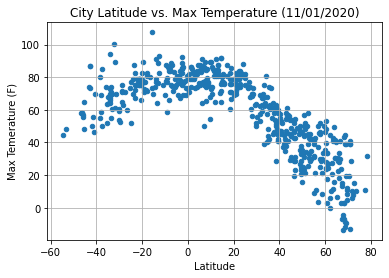

In [10]:
weather_df.plot('Lat', 'Max Temp', kind='scatter')
plt.title("City Latitude vs. Max Temperature (11/01/2020)")
plt.xlabel("Latitude")
plt.ylabel("Max Temerature (F)")
plt.grid(b=None)
plt.show()


In [ ]:
# plotting the T against latitude for cities - clearly we can see the T rises as you get closer to latitude 0 (the equator)

## Latitude vs. Humidity Plot

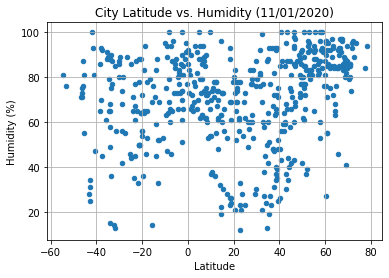

In [11]:
weather_df.plot('Lat', 'Humidity', kind='scatter')
plt.title("City Latitude vs. Humidity (11/01/2020)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(b=None)
plt.show()

In [ ]:
# charting humidity vs latitude - it doesn't seem to be as clear as the T vs latitude correlation but it does appear that the equator isn't as humid as the poles

## Latitude vs. Cloudiness Plot

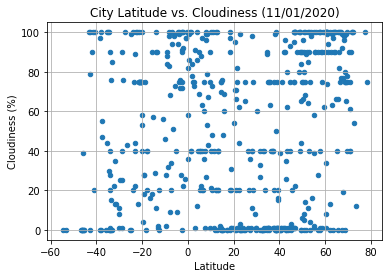

In [12]:
weather_df.plot('Lat', 'Cloudiness', kind='scatter')
plt.title("City Latitude vs. Cloudiness (11/01/2020)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(b=None)
plt.show()

In [ ]:
#charting cloudiness vs latitude - there doesn't seem to be any difference in the amount of cloudiness you can expect in the southern or northern hemisphere vs the equator

## Latitude vs. Wind Speed Plot

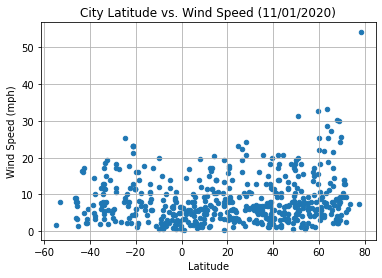

In [13]:
weather_df.plot('Lat', 'Wind Speed', kind='scatter')
plt.title("City Latitude vs. Wind Speed (11/01/2020)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid(b=None)
plt.show()

In [ ]:
#charting wind speed vs latitude - it appears that the equator has less wind in general (perhaps that's why it's described as the doldrums)

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.7700861166416565


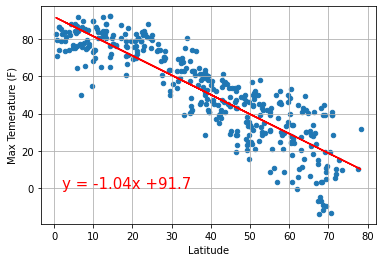

In [14]:
north_hemisphere_df = pd.DataFrame(weather_dictionary)

north_hemisphere_df.drop(north_hemisphere_df[north_hemisphere_df["Lat"] < 0].index, inplace = True)

north_hemisphere_df.to_csv('output_data/north_hemisphere_cities.csv')

x_values = north_hemisphere_df["Lat"]
y_values = north_hemisphere_df["Max Temp"]
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

north_hemisphere_df.plot('Lat', 'Max Temp', kind='scatter')
plt.plot(x_values,regress_values,"r-")
plt.xlabel("Latitude")
plt.ylabel("Max Temerature (F)")
plt.grid(b=None)
plt.annotate(line_eq,(2,0),fontsize=15,color="red")
print(f"The r-value is: {rvalue**2}")

plt.savefig("output_data/North_Hemisphere_Lat_vs_Temp.png")
plt.show()

In [ ]:
#r value ~0.8 shows clear correlation between latitude and expected T. The closer to lat 0 (the equator), the higher your expected T

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.29545221561931545


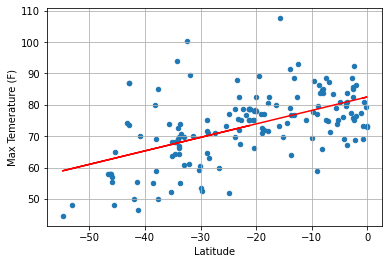

In [15]:
south_hemisphere_df = pd.DataFrame(weather_dictionary)

south_hemisphere_df.drop(south_hemisphere_df[south_hemisphere_df["Lat"] > 0].index, inplace = True)

south_hemisphere_df.to_csv('output_data/south_hemisphere_cities.csv')

x_values = south_hemisphere_df["Lat"]
y_values = south_hemisphere_df["Max Temp"]
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

south_hemisphere_df.plot('Lat', 'Max Temp', kind='scatter')
plt.plot(x_values,regress_values,"r-")
plt.xlabel("Latitude")
plt.ylabel("Max Temerature (F)")
plt.grid(b=None)
plt.annotate(line_eq,(-55,38),fontsize=15,color="red")
print(f"The r-value is: {rvalue**2}")

plt.savefig("output_data/South_Hemisphere_Lat_vs_Temp.png")
plt.show()

In [ ]:
#r value ~.3 shows a statistically significant correlation between latitude and T in the southern hemisphere (though not as strictly defined as the correlation for the northern hemisphere

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.10461371179383115


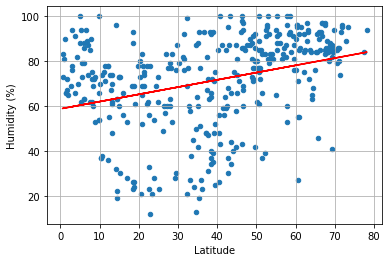

In [16]:
x_values = north_hemisphere_df["Lat"]
y_values = north_hemisphere_df["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

north_hemisphere_df.plot('Lat', 'Humidity', kind='scatter')
plt.plot(x_values,regress_values,"r-")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(b=None)
plt.annotate(line_eq,(2,0),fontsize=15,color="red")
print(f"The r-value is: {rvalue**2}")

plt.savefig("output_data/North_Hemisphere_Lat_vs_Humid.png")
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.030950582560092414


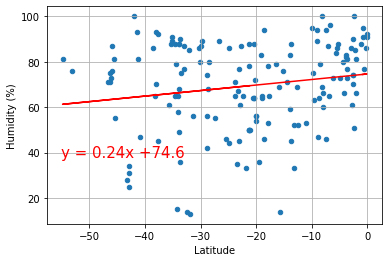

In [17]:
x_values = south_hemisphere_df["Lat"]
y_values = south_hemisphere_df["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

south_hemisphere_df.plot('Lat', 'Humidity', kind='scatter')
plt.plot(x_values,regress_values,"r-")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(b=None)
plt.annotate(line_eq,(-55,38),fontsize=15,color="red")
print(f"The r-value is: {rvalue**2}")

plt.savefig("output_data/South_Hemisphere_Lat_vs_Humid.png")
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.04891630519201395


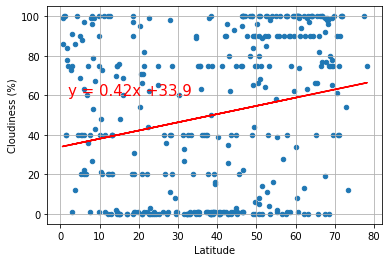

In [18]:
x_values = north_hemisphere_df["Lat"]
y_values = north_hemisphere_df["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

north_hemisphere_df.plot('Lat', 'Cloudiness', kind='scatter')
plt.plot(x_values,regress_values,"r-")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(b=None)
plt.annotate(line_eq,(2,60),fontsize=15,color="red")
print(f"The r-value is: {rvalue**2}")

plt.savefig("output_data/North_Hemisphere_Lat_vs_Cloud.png")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.11144519611726084


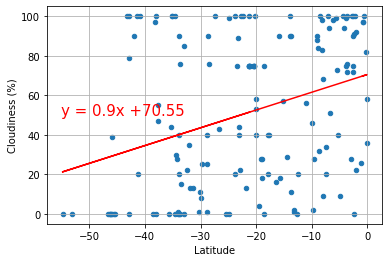

In [19]:
x_values = south_hemisphere_df["Lat"]
y_values = south_hemisphere_df["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

south_hemisphere_df.plot('Lat', 'Cloudiness', kind='scatter')
plt.plot(x_values,regress_values,"r-")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(b=None)
plt.annotate(line_eq,(-55,50),fontsize=15,color="red")
print(f"The r-value is: {rvalue**2}")

plt.savefig("output_data/South_Hemisphere_Lat_vs_Cloud.png")
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.04412335633449495


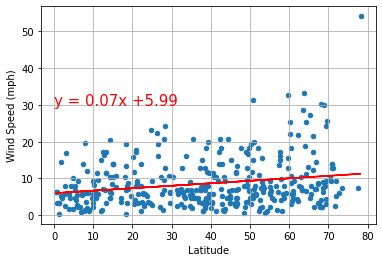

In [20]:
x_values = north_hemisphere_df["Lat"]
y_values = north_hemisphere_df["Wind Speed"]
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

north_hemisphere_df.plot('Lat', 'Wind Speed', kind='scatter')
plt.plot(x_values,regress_values,"r-")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid(b=None)
plt.annotate(line_eq,(0,30),fontsize=15,color="red")
print(f"The r-value is: {rvalue**2}")

plt.savefig("output_data/North_Hemisphere_Lat_vs_Wind.png")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.03345678426193112


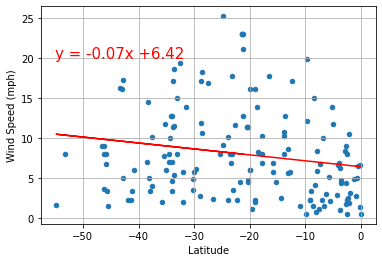

In [21]:
x_values = south_hemisphere_df["Lat"]
y_values = south_hemisphere_df["Wind Speed"]
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

south_hemisphere_df.plot('Lat', 'Wind Speed', kind='scatter')
plt.plot(x_values,regress_values,"r-")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid(b=None)
plt.annotate(line_eq,(-55,20),fontsize=15,color="red")
print(f"The r-value is: {rvalue**2}")

plt.savefig("output_data/South_Hemisphere_Lat_vs_Wind.png")
plt.show()